In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import ast
from datetime import datetime

data_path = './data/'
cmu_character = pd.read_csv(data_path+'cmu_character.csv')

In [386]:
cmu_character
# cmu_character['actor_height'][cmu_character['actor_height']>2.5] = np.nan

,wikiID,freebase_movID,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,freebase_char_actor_map,freebase_charID,freebase_actorID,release_date,is_principal,persona,fameScore_before,fameScore_after,fameScore_diff
0,975900,/m/03vyhn,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001-08-24,0.0,NaN,11.112213,11.575444,0.463231
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001-08-24,0.0,35.0,22.125281,22.122250,-0.003031
2,975900,/m/03vyhn,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001-08-24,1.0,NaN,33.033075,33.028550,-0.004525
3,975900,/m/03vyhn,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001-08-24,1.0,NaN,88.360114,88.348011,-0.012103
4,975900,/m/03vyhn,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001-08-24,0.0,NaN,30.626760,30.622565,-0.004195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331131,9971909,/m/02pygw1,NaN,1938-11-26,M,NaN,NaN,Rich Little,33.0,/m/02vbk4r,NaN,/m/03m6t5,1972-09-22,1.0,NaN,1.431091,1.430895,-0.000196
331132,9971909,/m/02pygw1,NaN,1918-10-02,M,NaN,NaN,Herb Voland,53.0,/m/0ggdv2_,NaN,/m/02qylb9,1972-09-22,1.0,NaN,4.172349,4.171777,-0.000572
331133,28308153,/m/0cp05t9,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957-01-01,1.0,NaN,0.000000,0.802080,0.802080
331134,28308153,/m/0cp05t9,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957-01-01,0.0,NaN,0.000000,0.668400,0.668400


In [387]:
cmu_actors = cmu_character[['freebase_char_actor_map','actor_gender','actor_age_at_release','actor_ethnicity','persona']].copy()
cmu_actors.dropna(inplace=True)
cmu_actors.drop(columns=['persona'])

bins=[0, 40, 60, 80, 100]
cmu_actors['actor_age_at_release'] = pd.cut(cmu_actors['actor_age_at_release'],bins=bins,labels=bins[:-1])

# bins = [1.4, 1.6, ei1.8, 2]
# cmu_actors['actor_hght'] = pd.cut(cmu_actors['actor_height'],bins=bins,labels=bins[1:])

cmu_actors = pd.get_dummies(cmu_actors,columns=['actor_gender','actor_ethnicity'])
cmu_actors.set_index('freebase_char_actor_map', inplace=True)

cmu_actors.dropna(inplace=True)

cmu_actors

,actor_age_at_release,persona,actor_gender_F,actor_gender_M,actor_ethnicity_/m/01267,actor_ethnicity_/m/012c1l,actor_ethnicity_/m/012f86,actor_ethnicity_/m/01336l,actor_ethnicity_/m/013b6_,actor_ethnicity_/m/013b7g,...,actor_ethnicity_/m/0h1nk0k,actor_ethnicity_/m/0h2138,actor_ethnicity_/m/0h6mqq9,actor_ethnicity_/m/0h8mzsl,actor_ethnicity_/m/0hbz9xw,actor_ethnicity_/m/0hj35,actor_ethnicity_/m/0j4w_,actor_ethnicity_/m/0j6x8,actor_ethnicity_/m/0x67,actor_ethnicity_/m/0xnvg
freebase_char_actor_map,,,,,,,,,,,,,,,,,,,,,
/m/0jys3m,0,35.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
/m/0jtx5t,0,46.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
/m/0jtx5h,0,4.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
/m/0jtx5n,0,41.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
/m/03jnxct,40,35.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/m/04p4q_p,0,40.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
/m/0cg660g,40,40.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
/m/05tg4vb,0,49.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [388]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cmu_actors)

In [406]:
eps = 1 # The maximum distance between two samples for one to be considered as in the neighborhood of the other.
min_samples = 50  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cmu_actors['cluster'] = dbscan.fit_predict(scaled_data)
cmu_actors['cluster'].max()

40

In [390]:
cmu_character = cmu_character.merge(cmu_actors[['cluster']],on='freebase_char_actor_map')
cmu_character

,wikiID,freebase_movID,character_name,actor_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_at_release,freebase_char_actor_map,freebase_charID,freebase_actorID,release_date,is_principal,persona,fameScore_before,fameScore_after,fameScore_diff,cluster
0,975900,/m/03vyhn,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001-08-24,0.0,35.0,22.125281,22.122250,-0.003031,0
1,156558,/m/014k4y,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,2001-06-27,0.0,46.0,1.945623,8.024791,6.079167,1
2,156558,/m/014k4y,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,2001-06-27,1.0,4.0,0.000000,9.629749,9.629749,2
3,156558,/m/014k4y,Rodney,1971-10-20,M,1.918,/m/0x67,Snoop Dogg,29.0,/m/0jtx5n,/m/03jnx_2,/m/01vw8mh,2001-06-27,0.0,41.0,14.648641,14.646634,-0.002007,2
4,156558,/m/014k4y,Melvin,1959-05-12,M,1.830,/m/0x67,Ving Rhames,42.0,/m/03jnxct,/m/03jnxcx,/m/032zg9,2001-06-27,0.0,35.0,97.306857,97.293528,-0.013329,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15550,6456053,/m/0g605h,Paolo Maltese,1927-10-18,M,1.850,/m/02ctzb,George C. Scott,37.0,/m/04p4q_p,/m/0hnw0l3,/m/0l786,1964-12-31,0.0,40.0,107.324441,107.309740,-0.014701,24
15551,6456053,/m/0g605h,Joey Friedlander,1918-11-04,M,1.770,/m/033tf_,Art Carney,46.0,/m/0cg660g,/m/0hnw0k2,/m/015qt5,1964-12-31,0.0,40.0,0.000000,6.228965,6.228965,17
15552,22330502,/m/05sync6,Yvonne Valbret,1905-09-18,F,1.702,/m/06mvq,Greta Garbo,25.0,/m/05tg4vb,/m/0h2ppfw,/m/0h14h,1931-01-31,0.0,49.0,16.033225,16.031029,-0.002196,-1
15553,24997872,/m/09g6klx,Raja,1951-09-07,M,1.780,/m/04mvp8,Mammootty,58.0,/m/0gvytkx,/m/0h27wx_,/m/02hkv5,2010-05-07,1.0,40.0,5.078524,5.077828,-0.000696,-1


In [523]:
for i in range(cmu_actors['cluster'].max()):
    test = cmu_character[cmu_character['cluster']==i]
    test = test.dropna(subset='persona').copy()
    test['persona'] = test['persona'].astype(int)

    test = test[['freebase_char_actor_map','fameScore_diff','persona']]

    formula = 'fameScore_diff ~ C(persona)'

    mod = smf.ols(formula=formula, data=test)
    res = mod.fit()

    # print(res.summary())

    print(res.params[res.pvalues<0.05])


C(persona)[T.10]    27.126195
dtype: float64
Series([], dtype: float64)
Series([], dtype: float64)
Series([], dtype: float64)
C(persona)[T.40]    9.954592
dtype: float64
C(persona)[T.30]    14.102653
dtype: float64
C(persona)[T.9]    18.472182
dtype: float64
C(persona)[T.15]    20.526975
dtype: float64
C(persona)[T.5]    78.494911
dtype: float64
Series([], dtype: float64)
C(persona)[T.5]     24.025458
C(persona)[T.12]    16.269077
C(persona)[T.35]    18.172857
dtype: float64
Intercept           33.081164
C(persona)[T.36]    61.859707
dtype: float64
Intercept          19.881867
C(persona)[T.2]   -18.182131
dtype: float64
Series([], dtype: float64)
C(persona)[T.9]     47.537827
C(persona)[T.27]    60.885378
dtype: float64
Intercept           24.967915
C(persona)[T.2]    -23.800630
C(persona)[T.10]   -19.895885
C(persona)[T.12]   -24.971368
C(persona)[T.14]   -24.969880
C(persona)[T.17]   -18.533189
C(persona)[T.21]   -22.323830
C(persona)[T.25]   -22.906021
C(persona)[T.27]   -24.509992


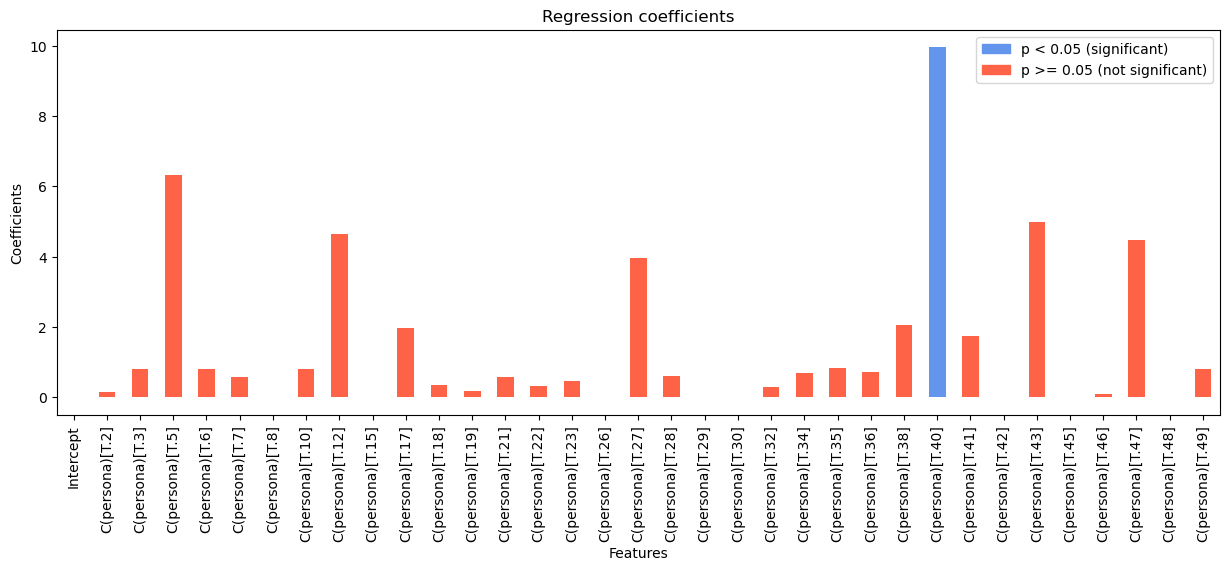

In [512]:
colors = ['cornflowerblue' if p < 0.05 else 'tomato' for p in res.pvalues]

res.params.plot.bar(figsize=(15,5) ,color=colors)

significant_patch = mpatches.Patch(color='cornflowerblue', label='p < 0.05 (significant)')
not_significant_patch = mpatches.Patch(color='tomato', label='p >= 0.05 (not significant)')
plt.legend(handles=[significant_patch, not_significant_patch])

plt.title('Regression coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [513]:
# cmu_actors[cmu_actors['actor_age_at_release']==0]['cluster'].unique()

In [514]:
# cmu_actors[cmu_actors['actor_age_at_release']==80]['cluster'].unique()

In [515]:
cmu_actors.groupby('cluster').count()

,actor_age_at_release,persona,actor_gender_F,actor_gender_M,actor_ethnicity_/m/01267,actor_ethnicity_/m/012c1l,actor_ethnicity_/m/012f86,actor_ethnicity_/m/01336l,actor_ethnicity_/m/013b6_,actor_ethnicity_/m/013b7g,...,actor_ethnicity_/m/0h1nk0k,actor_ethnicity_/m/0h2138,actor_ethnicity_/m/0h6mqq9,actor_ethnicity_/m/0h8mzsl,actor_ethnicity_/m/0hbz9xw,actor_ethnicity_/m/0hj35,actor_ethnicity_/m/0j4w_,actor_ethnicity_/m/0j6x8,actor_ethnicity_/m/0x67,actor_ethnicity_/m/0xnvg
cluster,,,,,,,,,,,,,,,,,,,,,
-1,7047,7047,7047,7047,7047,7047,7047,7047,7047,7047,...,7047,7047,7047,7047,7047,7047,7047,7047,7047,7047
0,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
1,208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
2,561,561,561,561,561,561,561,561,561,561,...,561,561,561,561,561,561,561,561,561,561
3,334,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334
4,641,641,641,641,641,641,641,641,641,641,...,641,641,641,641,641,641,641,641,641,641
5,335,335,335,335,335,335,335,335,335,335,...,335,335,335,335,335,335,335,335,335,335
6,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
7,356,356,356,356,356,356,356,356,356,356,...,356,356,356,356,356,356,356,356,356,356


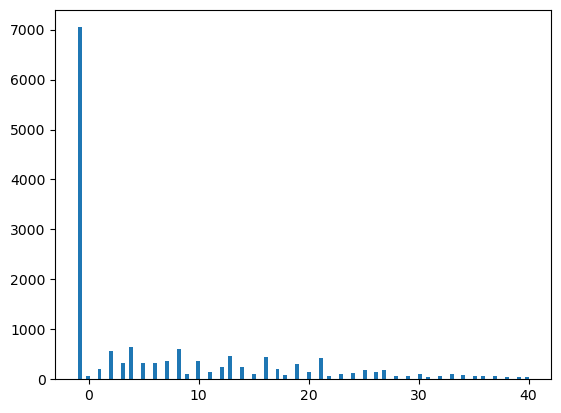

In [516]:
cmu_character[cmu_character['cluster']==1]

plt.hist(cmu_actors['cluster'],bins=114)
plt.show()

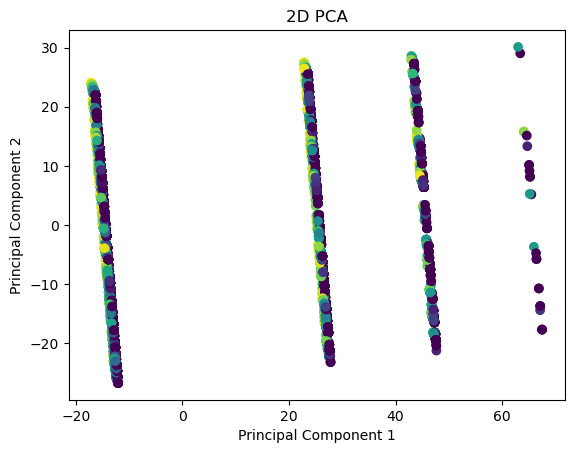

In [517]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)  # Set the number of components to 2 for 2D visualization
principal_components = pca.fit_transform(cmu_actors)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the 2D PCA
plt.scatter(pc_df['PC1'], pc_df['PC2'],c=cmu_actors['cluster'], cmap='viridis')
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

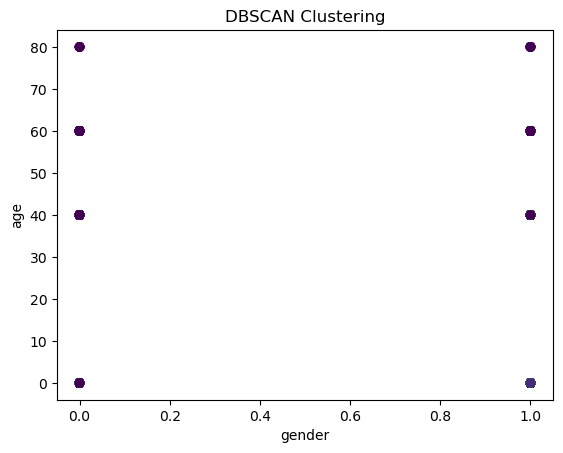

In [518]:
plt.scatter(cmu_actors['actor_gender_M'], cmu_actors['actor_age_at_release'], c=cmu_actors['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('gender')
plt.ylabel('age')

# plt.xaxis([0,2])
plt.show()


In [519]:
# cmu_character_gender = cmu_character.dropna(subset='actor_gender').copy()
cmu_character_male = cmu_character.query("actor_gender == 'M'").copy()
cmu_character_female = cmu_character.query("actor_gender == 'F'").copy()
# cmu_character.groupby("freebase_actorID").apply(lambda x: x.iloc[0])

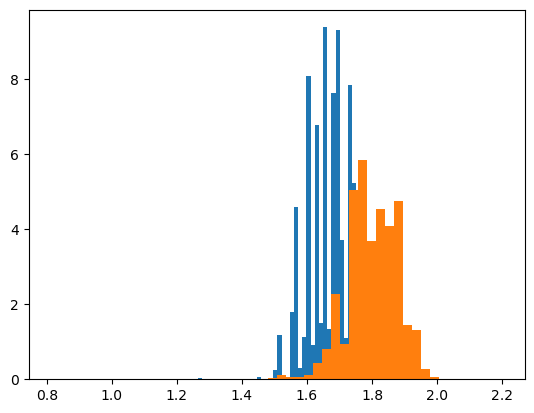

In [520]:
plt.hist(cmu_character_female['actor_height'],bins=50,density=True)
plt.hist(cmu_character_male['actor_height'],bins=50,density=True)
plt.show()

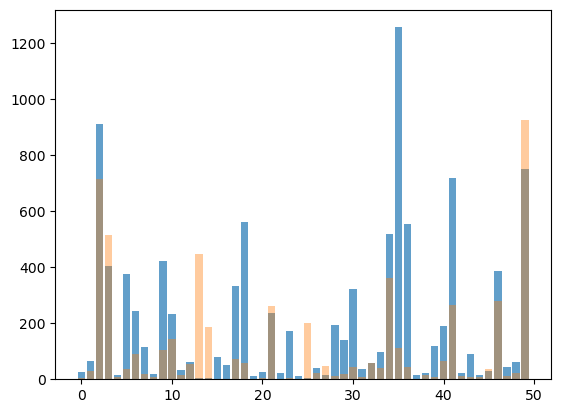

In [521]:
female_persona_count = cmu_character_female[['actor_ethnicity','persona']]\
                  .groupby('persona',as_index=False).count().rename(columns={'actor_ethnicity':'count'})
female_persona_count.sort_values('count',inplace=True,ascending=False)

male_persona_count = cmu_character_male[['actor_ethnicity','persona']]\
                  .groupby('persona',as_index=False).count().rename(columns={'actor_ethnicity':'count'})
male_persona_count.sort_values('count',inplace=True,ascending=False)

plt.bar(male_persona_count['persona'],male_persona_count['count'],alpha=0.7)
plt.bar(female_persona_count['persona'],female_persona_count['count'],alpha=0.4)
plt.show()

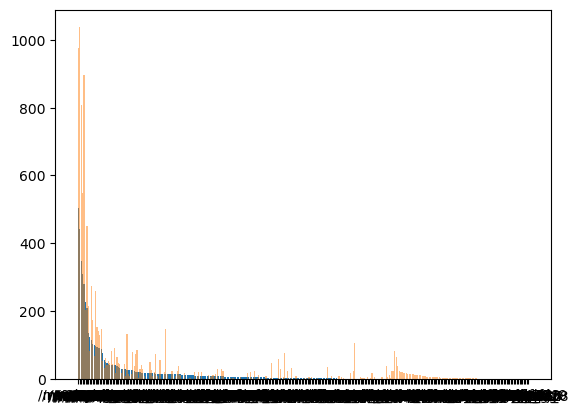

In [522]:
female_ethnicity_count = cmu_character_female[['actor_ethnicity','persona']]\
                  .groupby('actor_ethnicity',as_index=False).count().rename(columns={'persona':'count'})
female_ethnicity_count.sort_values('count',inplace=True,ascending=False)

male_ethnicity_count = cmu_character_male[['actor_ethnicity','persona']]\
                  .groupby('actor_ethnicity',as_index=False).count().rename(columns={'persona':'count'})
male_ethnicity_count.sort_values('count',inplace=True,ascending=False)


plt.bar(female_ethnicity_count['actor_ethnicity'],female_ethnicity_count['count'],alpha=1)
plt.bar(male_ethnicity_count['actor_ethnicity'],male_ethnicity_count['count'],alpha=0.5)
plt.show()